In [1]:
%matplotlib inline
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
# pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))
pd.set_option('display.max_columns', None) #输出所有列

def set_ch():
    from pylab import mpl
    #中文字体问题已经解决，记录在evernote中
    #mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
    mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
set_ch()
from datetime import datetime,timedelta
import matplotlib
matplotlib.style.use('ggplot')
import sys
import json

In [2]:
from factor_analyzer import FactorAnalyzer
df_allFeatures = pd.read_csv('data/allFeatures.csv')

### 预处理

In [4]:
# filtering the meaningless columns
df_allFeatures = df_allFeatures.drop(['ins_sd', 'ins_four_1', 'ins_four_2','ins_four_3','ins_min', 'ins_summit_min'],axis=1)

In [5]:
# finding the the columns including NAN
def findingNAN(df):
    colNaN = [col for col in df.columns.values if df[col].isnull().any()==True]
    return colNaN



# filling the NAN upon the suggestion of sara
def filling(df, col_li):
    df['pub_avg'] = df.pub_avg.fillna(df.pub_avg.mean(skipna=True))
    col_li.remove('pub_avg')
    for col in col_li:
        df[col] = df[col].fillna(0)
    return df


# findingNAN——>filling——>standardization
from sklearn import preprocessing
def processing(df):
    col_toBeFill = findingNAN(df)
    filled = filling(df, col_toBeFill)
    
    X = filled.iloc[:,6:-3].values
    scaler = preprocessing.StandardScaler().fit(X)
    X_sd = scaler.transform(X)
    df_sd = pd.DataFrame(X_sd)
    df_sd.columns = df.iloc[:, 6:-3].columns.values
    return df_sd

In [6]:
df_X = processing(df_allFeatures)
df_X.head(3)

,ex_subrate,sub_ins_sd,sub_ins_m,ins_m,auc_sub_avg,auc_sub_sd,ins_max,ins_summit_four_1,ins_summit_four_2,ins_summit_four_3,ins_summit_max,0point_sub,1point_sub,2point_sub,3point_sub,4point_sub,5point_sub,6point_sub,7point_sub,8point_sub,9point_sub,10point_sub,11point_sub,12point_sub,13point_sub,14point_sub,15point_sub,16point_sub,17point_sub,18point_sub,19point_sub,20point_sub,21point_sub,22point_sub,23point_sub,0point_ex,1point_ex,2point_ex,3point_ex,4point_ex,5point_ex,6point_ex,7point_ex,8point_ex,9point_ex,10point_ex,11point_ex,12point_ex,13point_ex,14point_ex,15point_ex,16point_ex,17point_ex,18point_ex,19point_ex,20point_ex,21point_ex,22point_ex,23point_ex,notscWe_sub,notscWe_ex,notscWd_sub,notscWd_ex,sc_sub,sc_ex,pub_avg,pub_sd,n_ex
0,-0.361577,-0.786224,-0.382721,0.927806,0.674563,-1.009992,0.657964,-0.125647,0.203577,0.070859,-0.971936,-0.075992,-0.053286,-0.055738,-0.046149,-0.048629,-0.063615,-0.187862,-0.324343,-0.403366,-0.359561,-0.430731,-0.499435,-0.441617,-0.498844,-0.447117,-0.467167,-0.516747,-0.581672,-0.648357,-0.606850,0.674575,-0.079822,-0.285639,-0.189026,-0.060439,-0.044523,-0.051493,-0.038266,-0.03656,-0.023851,-0.127444,-0.308602,-0.379567,-0.327445,-0.438014,-0.491019,-0.443529,-0.491139,-0.451035,-0.460430,-0.517613,-0.574557,-0.636855,-0.615074,0.762360,-0.075576,-0.223672,-0.183007,-0.453688,-0.400729,-0.730534,-0.668128,-0.355483,-0.274871,1.580239,0.988537,-0.588667
1,-0.888529,-0.866597,-0.518167,0.117913,0.766139,-0.840865,-0.068787,0.828026,0.193523,-0.089811,-0.980802,-0.075992,-0.053286,-0.055738,-0.046149,-0.048629,-0.063615,-0.187862,-0.324343,-0.159331,-0.464483,-0.430731,-0.499435,-0.441617,-0.498844,-0.025307,-0.340401,-0.516747,-0.581672,-0.648357,0.937627,0.697380,0.194237,-0.406556,-0.189026,-0.060439,-0.044523,-0.051493,-0.038266,-0.03656,-0.023851,-0.127444,-0.308602,-0.155319,-0.441771,-0.438014,-0.491019,-0.443529,-0.491139,0.046445,-0.388044,-0.517613,-0.574557,-0.636855,1.084464,0.722600,0.275399,-0.388228,-0.183007,-0.709329,-0.690020,0.481738,0.522135,-0.355483,-0.281963,0.599517,0.608781,-0.469376
2,-0.388290,-0.927611,-0.645983,0.055462,0.879979,-1.467298,0.213838,0.565906,-0.093004,-0.282794,-1.049103,-0.075992,-0.053286,-0.055738,-0.046149,-0.048629,-0.063615,-0.187862,-0.324343,-0.403366,-0.464483,-0.430731,-0.499435,-0.441617,-0.498844,-0.447117,-0.467167,-0.516747,-0.202820,-0.422215,-0.629563,1.244690,-0.018920,0.016656,-0.189026,-0.060439,-0.044523,-0.051493,-0.038266,-0.03656,-0.023851,-0.127444,-0.308602,-0.379567,-0.441771,-0.438014,-0.491019,-0.443529,-0.491139,-0.451035,-0.460430,-0.517613,-0.153319,-0.346346,-0.594092,1.573463,-0.048987,0.138352,-0.183007,-0.512682,-0.387494,-0.264275,-0.188522,-0.256692,-0.136580,0.577716,0.686580,-0.359846


In [7]:
# bartlett sphericity
import factor_analyzer
factor_analyzer.factor_analyzer.calculate_bartlett_sphericity(df_X)

/Users/shirui/anaconda2/envs/py3/lib/python3.6/site-packages/factor_analyzer-0.2.2-py3.6.egg/factor_analyzer/factor_analyzer.py:185: RuntimeWarning: invalid value encountered in log


(nan, nan)

### KMO test

In [8]:
# KMO test
kmo_per_variable, kmo_total = factor_analyzer.factor_analyzer.calculate_kmo(df_X)
kmo_total

0.21813251015929427

在进行因子分析之前先做KMO检验和球形检验。根据以上KMO检验的结果得出，各variable之间的相关性并不大，当KMO小于0.5时候都不适合做因子分析。

### FA

In [9]:
fa_noRota= FactorAnalyzer()
fa_noRota.analyze(df_X, 17, rotation=None)
fa_varimax= FactorAnalyzer()
fa_varimax.analyze(df_X, 17, rotation='varimax')
fa_promax = FactorAnalyzer()
fa_promax.analyze(df_X, 17, rotation='promax')

/Users/shirui/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


选择17个component由于pca时候17个主成分的解释度达到75%

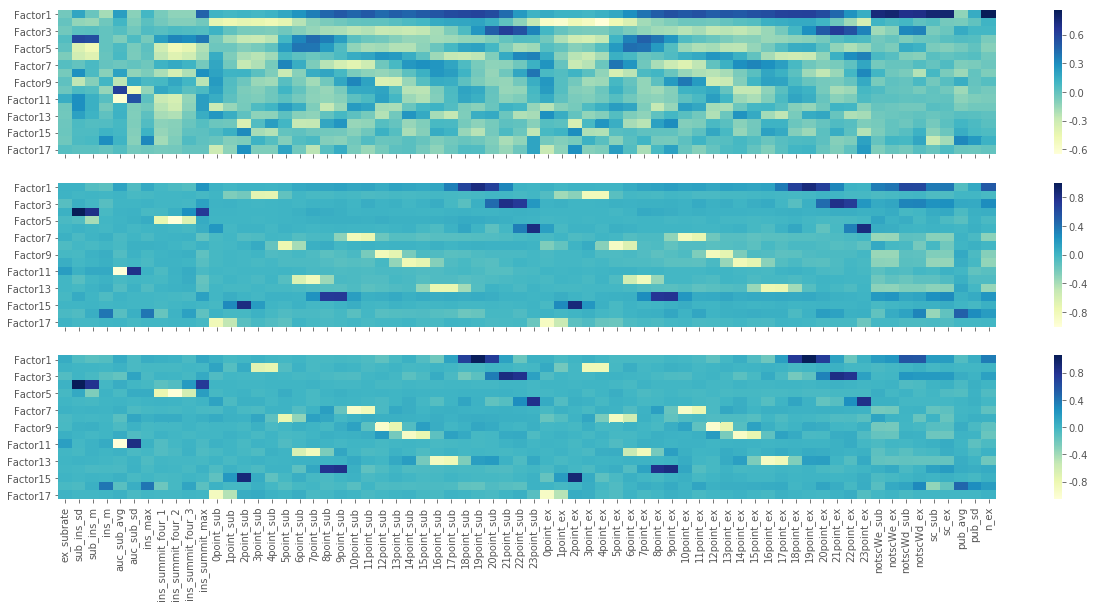

In [24]:
import seaborn as sns
plt.rc('figure', figsize=(21, 9))
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
sns.heatmap(fa_noRota.loadings.T, ax=ax1,cmap="YlGnBu")
sns.heatmap(fa_varimax.loadings.T, ax=ax2,cmap="YlGnBu")
sns.heatmap(fa_promax.loadings.T, ax=ax3,cmap="YlGnBu")

no_ratation的结果相当于PCA的特征向量;   
varimax 与 promax 的结果类似

F1：18——20点的做题数量和提交数量（pos）；    
F2：3——4点的做题数量和提交数量（neg）；     
F3：21——22点的做题数量和提交数量（pos）；   
F4：两次提交之间的时间间隔std/mean, 两次提交的最大时间间隔（单位s）;   
F5：两次提交的时间间隔的四分位数；    
F6：23点的做题数量和提交数量（pos）；  
F7：10——11点的做题数量和提交数量（neg）；  
F8：5——6点的做题数量和提交数量（neg）；     
F9：12——13点的做题数量和提交数量（neg）；   
F10：13——15点的做题数量和提交数量（neg）；   
F11：每次提交得到的分数的平均（neg）， 每次提交得到的分数的方差（pos）；  
F12：6——8点的做题数量和提交数量（neg）；   
F13：16——17点的做题数量和提交数量（neg）；   
F14：8——9点的做题数量和提交数量（pos）；   
F15：2点的做题数量和提交数量（pos）；   
F16：做作业间隔天数的均值（pos），老师布置作业后平均过几天去做(pos)
F17：0——1点的做题数量和提交数量（neg）

依据构造的指标来看，这堆数据的主要信息量体现在学生在几个时刻上的做题数和提交数量,其次是两次提交的时间间隔，每次提交得到的分数，做作业的间隔天数

In [49]:
ev, v = fa_noRota.get_eigenvalues()
(ev / ev.sum(axis=0).values).cumsum()

,Original_Eigenvalues
0,0.290723
1,0.377774
2,0.457914
3,0.524931
4,0.584202
5,0.639917
6,0.690760
7,0.732772
8,0.772427
9,0.809976


In [50]:
fa_varimax.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17
SS Loadings,5.660315,2.586792,3.269262,2.309477,2.157583,1.766260,3.264754,2.233909,3.091846,3.176917,1.739080,2.458858,3.368580,2.802746,1.678570,1.181629,2.015790
Proportion Var,0.083240,0.038041,0.048077,0.033963,0.031729,0.025974,0.048011,0.032852,0.045468,0.046719,0.025575,0.036160,0.049538,0.041217,0.024685,0.017377,0.029644
Cumulative Var,0.083240,0.121281,0.169358,0.203321,0.235050,0.261025,0.309036,0.341888,0.387356,0.434075,0.459650,0.495810,0.545348,0.586564,0.611249,0.628626,0.658270


### 尝试3个主成分

In [51]:
fa_noRota= FactorAnalyzer()
fa_noRota.analyze(df_X, 3, rotation=None)
fa_varimax= FactorAnalyzer()
fa_varimax.analyze(df_X, 3, rotation='varimax')
fa_promax = FactorAnalyzer()
fa_promax.analyze(df_X, 3, rotation='promax')

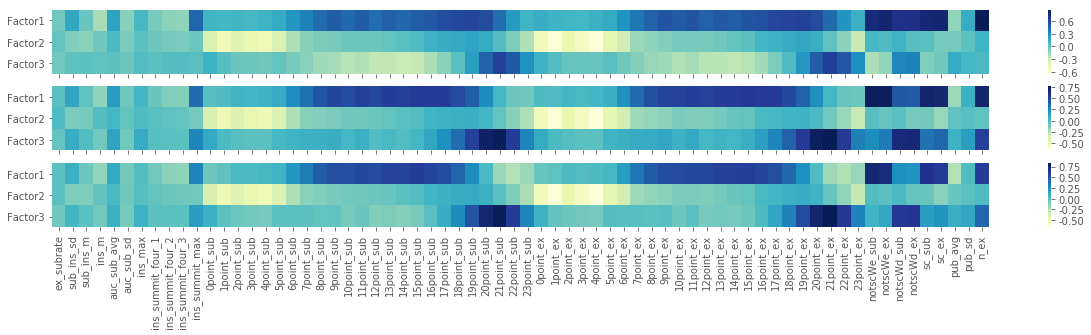

In [54]:
import seaborn as sns
plt.rc('figure', figsize=(21, 4))
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
sns.heatmap(fa_noRota.loadings.T, ax=ax1,cmap="YlGnBu")
sns.heatmap(fa_varimax.loadings.T, ax=ax2,cmap="YlGnBu")
sns.heatmap(fa_promax.loadings.T, ax=ax3,cmap="YlGnBu")

尝试3个component后信息量主要是体现在几个主要时间段内的提交数量，以及周末/寒暑假的做作业题目数，总的做题数

### explore1：除去各个时间段提交的数量数据

In [58]:
df_newX = df_X[['ex_subrate', 'sub_ins_sd', 'sub_ins_m', 'ins_m', 'auc_sub_avg',
       'auc_sub_sd', 'ins_max', 'ins_summit_four_1', 'ins_summit_four_2',
       'ins_summit_four_3', 'ins_summit_max', 'notscWe_sub', 'notscWe_ex',
       'notscWd_sub', 'notscWd_ex', 'sc_sub', 'sc_ex', 'pub_avg', 'pub_sd',
       'n_ex']]

In [59]:
def PCA(X,criterion):
    # calculate the eigen_vals & eigen_vecs
    cov_mat = np.cov(X.T)
    eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
    total = sum(eigen_vals)
    
    # calculate the cum_var_exp
    var_exp = [(i / total) for i in sorted(eigen_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)
    
    # select the number of the principle component with criterion
    for i in range(len(cum_var_exp)):
        if cum_var_exp[i] > criterion:
            n_compon = i
            break
    compon_weight_matrix = eigen_vecs[:,0:n_compon]       
            
    # compute the components    
    components = pd.DataFrame(X.dot(compon_weight_matrix))    
    
    return (n_compon, criterion, cum_var_exp, var_exp, compon_weight_matrix, components)

In [73]:
n_compon, criterion, cum_var_exp, var_exp, compon_weight_matrix, components = PCA(df_newX.values, 0.75)
n_compon

6

In [69]:
# FA
fa_noRota= FactorAnalyzer()
fa_noRota.analyze(df_newX, 6, rotation=None)
fa_varimax= FactorAnalyzer()
fa_varimax.analyze(df_newX, 6, rotation='varimax')
fa_promax = FactorAnalyzer()
fa_promax.analyze(df_newX, 6, rotation='promax')

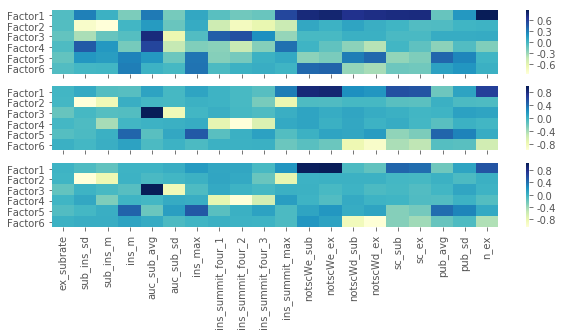

In [71]:
import seaborn as sns
plt.rc('figure', figsize=(10, 4))
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
sns.heatmap(fa_noRota.loadings.T, ax=ax1,cmap="YlGnBu")
sns.heatmap(fa_varimax.loadings.T, ax=ax2,cmap="YlGnBu")
sns.heatmap(fa_promax.loadings.T, ax=ax3,cmap="YlGnBu")

如果排除了用户在各个时间段内做题数和提交数相关的variable后，可以发现主要的信息提现在：     
FA1：周末的做题数和寒暑假的做题数（pos）；   
FA2：两次提交的时间间隔（neg）；   
FA3：提交后得到的分数的均值（pos）和方差（neg）；    
FA4：两次提交的最小时间间隔（neg）；    
FA5：做作业间隔天数的均值（pos），最大的做作业间隔天数（pos）；   
FA6：工作日的做作业数量和提交次数

In [74]:
df_newX.to_csv('data/timeNosub.csv')

# 结论

1. 变量间的相关度较低, 不适合做PCA或者FA；
2. 从结果看来，这堆数据的信息量主要体现在用户在几个主要时间段内的做题数量和提交数量，两次提交的时间间隔。因此，担心的一个问题是，构造出的这堆variable量太大覆盖了其他的variable的信息，因此做了explore1。
3. explore1: 除去各个时间段提交的数量数据相关的variable后，主要的信息体现在： 周末/工作日的做作业数量和提交次数；两次提交的时间间隔；提交后得到的分数